# Stock Unsystematic Rick Chart

In [1]:
# Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

In [2]:
start = '2019-01-01' #input
end = '2020-07-01' #input
symbol1 = '^GSPC' #input
symbol2 = 'AMD' #input

In [3]:
market = yf.download(symbol1, start=start, end=end)['Adj Close']
stocks = yf.download(symbol2, start=start, end=end)['Adj Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [4]:
market_returns = market.pct_change().dropna()
stocks_returns = stocks.pct_change().dropna()

In [5]:
def unsystematic_risk(stocks_returns, market_returns):
    m = np.matrix([stocks_returns, market_returns])
    beta = np.cov(m)[0][1] / np.std(market_returns)
    portfolio_risk = stocks_returns.std()
    market_risk = market_returns.std()
    unsys_risk = stocks_returns - beta*market_risk
    return unsys_risk

Text(0, 0.5, 'Unsystematic Risk')

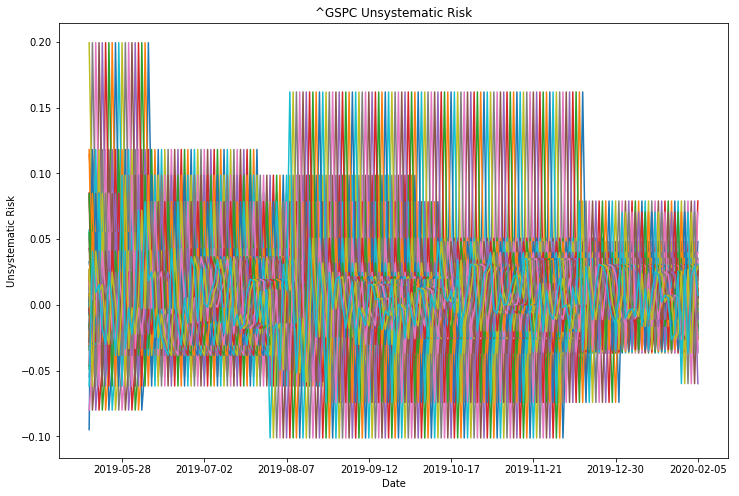

In [6]:
# Compute the running Unsystematic Risk
running = [unsystematic_risk(stocks_returns[i-90:i], market_returns[i-90:i]) for i in range(90, len(stocks_returns))]


# Plot running Beta up to 100 days before the end of the data set
_, ax1 = plt.subplots(figsize=(12,8))
ax1.plot(range(90, len(stocks_returns)-100), running[:-100])
ticks = ax1.get_xticks()
ax1.set_xticklabels([stocks.index[int(i)].date() for i in ticks[:-1]]) # Label x-axis with dates
plt.title(symbol1 + ' Unsystematic Risk')
plt.xlabel('Date')
plt.ylabel('Unsystematic Risk')